## Detecting Credit Worthiness

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal is to build a model that borrowers can use to help make the best financial decisions.

### 1. Load the Dataset and prepare it for the algorithm
- Load the dataset, check the first five observations, check the column names, check the summary of the dataset (describe method) to see if there are any outliers or any missing values.

- If there are any outliers, cap the dataset with 0.95 quantile:
```
 x=data['columnname'].quantile(0.95)
 data['columnname']=np.where(data['columnname']>x,x,data['columnname'])
 ```

- Split data into atribute set and target

- split into test and train data sets

- If you see any need for scaling, scale the data column by dividing by maximum of that column



In [2]:
%pwd

'C:\\Users\\user1'

In [16]:
import pandas as pd
data = pd.read_csv('4-cs-training.csv')

In [6]:
data.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
data.describe

<bound method NDFrame.describe of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-5

In [20]:
import numpy as np
x=data['DebtRatio'].quantile(0.95)
data['DebtRatio']=np.where(data['DebtRatio']>x,x,data['DebtRatio'])
data=data.dropna()

In [85]:
ones=[x for x in data.iloc[:,1] if x==1]
zeros=[x for x in data.iloc[:,1] if x==0]

In [89]:
print("Ones: {}".format(len(ones)))
print("Zeros: {}".format(len(zeros)))

Ones: 8357
Zeros: 111912


In [83]:
y

0         1
1         0
2         0
3         0
4         0
         ..
149994    0
149995    0
149996    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 120269, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,2:]
y=data.iloc[:,1]
maxincome=max(data['MonthlyIncome'])
X['MonthlyIncome']=X['MonthlyIncome']/maxincome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Comment:
- I understand that you are normalizing `MonthlyIncome`, I would do this for all variables.
- Please split your dataset into train and test datasets.
- Do all your preporcessing on the dataset with respect to the training dataset.
- When you fit your model, use your training dataset, and you can also split your training dataset into validation and training dataset inside the fit module. Keep in mind you still have your test dataset waiting.
- Dont forget to preprocess your test dataset with respect to training dataset later

### 2. Set up a baseline model 

- Use one hidden layer with activation 'relu'
- What activation should you use for output? Remember that this is a classification algorithm.
- Compile the model
- Fir the model, pick your epoch numbers and batch size. Use Test set as validation. 
- Visulaize train and test score as a function of epochs
- You can also use the `predict` method of your model and import `metrics` module from ScikitLearn to check accuracy metris in your test data set
- If you like you can use scikitlearn API for this section

In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


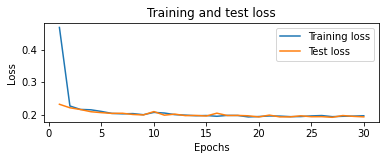

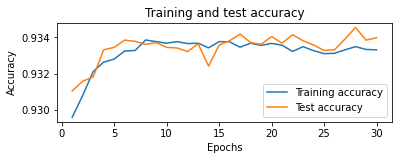

In [107]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

### 3. Controlling overfitting

- I tried to reduce overfitting myself and coudlnt succeed. Do not be surprised if any of the measures below does not help reducing the overfitting.
- Import `l2` fom `keras` and introduce `kernel_regularization` to both layers of your model
- Run `0.75` dropout with `l2` regularization
- In addition to two steps above, now include `batch_normalization`
- At each step visualize how your model is responding

In [108]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


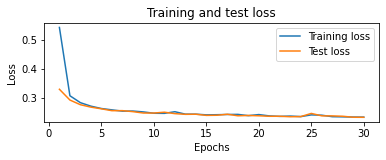

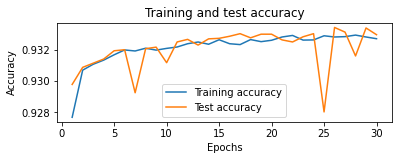

In [109]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

In [110]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


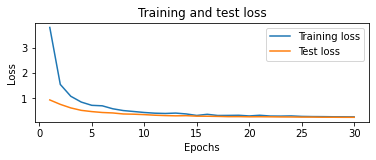

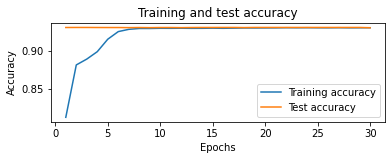

In [111]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

In [112]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


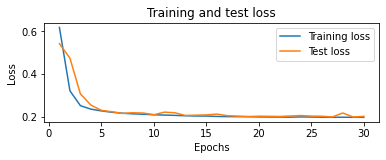

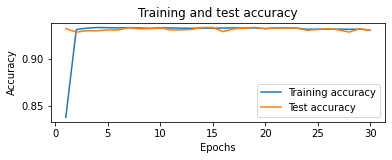

In [113]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

### 4. Add more number of layers and repeat step 3.

In [114]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


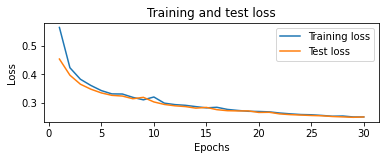

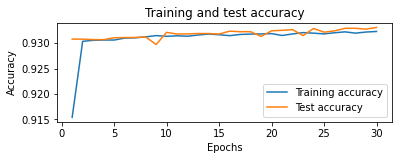

In [115]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

In [65]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


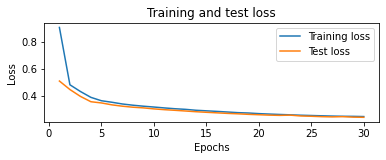

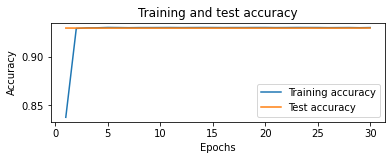

In [66]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

In [67]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.93


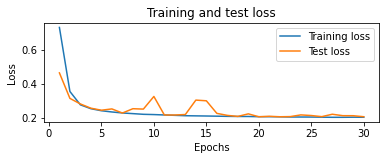

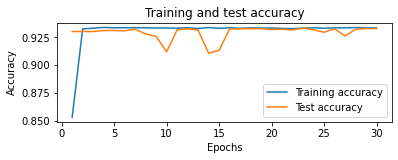

In [68]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values,  label='Training loss')
plt.plot(epochs, val_loss_values,  label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
#plt.grid(False)
plt.show()

In [94]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [95]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.69


In [96]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
X_under, y_under = undersample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.25, random_state=42)

In [99]:
y_under.size

16714

In [104]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20,input_dim=10,activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuarcy: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuarcy: 0.86
